# Градиентный бустинг

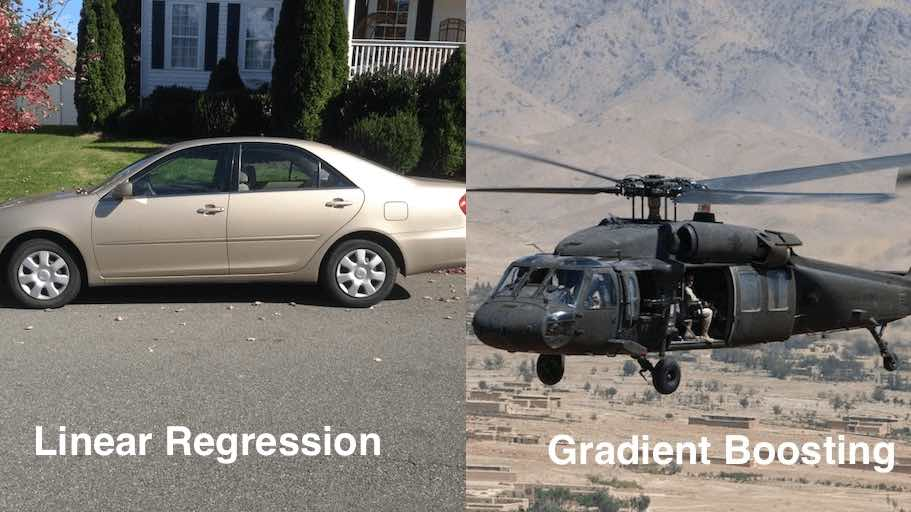

[Источник](https://neurohive.io/wp-content/uploads/2018/11/gradientnyi-busting-e1543335419162.jpg)

## Что мы изучим на этом занятии

* Бэггинг vs. Бустинг
* Как работает бустинг
* AdaBoost
* Градиентный бустинг

## Бэггинг vs. Бустинг

На прошлом занятии мы рассмотрели алгоритм случайного леса. Он использует концепцию **бэггинга**: несколько независимых слабых моделей (например, деревьев решений) обучаются параллельно на разных подвыборках данных, созданных методом случайного выбора с возвращением, и их предсказания усредняются для улучшения точности и уменьшения вариативности.

Помимо бэггинга сущствует другой подход к созданию ансамблей моделей: **бустинг** (англ. boosting). В бустинге, напротив, слабые модели обучаются последовательно, каждая новая модель исправляет ошибки предыдущих, уделяя больше внимания неправильно предсказанным данным, что позволяет улучшить точность, но может привести к переобучению.

Основная идея бустинга заключается в том, чтобы комбинировать несколько слабых моделей (например, деревья решений), которые по отдельности делают относительно плохие предсказания, в одну сильную модель, которая делает гораздо более точные прогнозы.

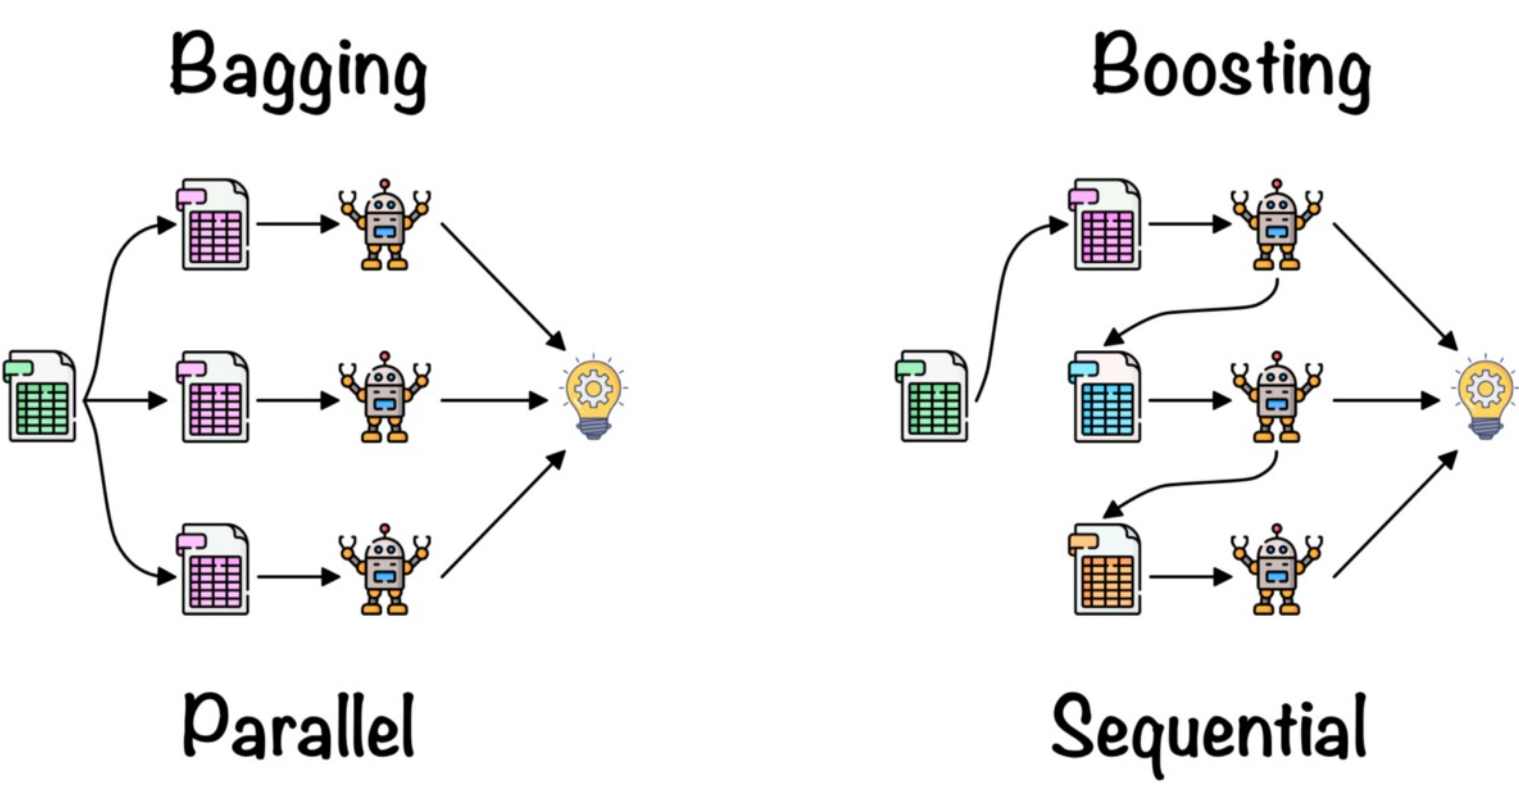

[Источник](https://vitalflux.com/bagging-vs-boosting-machine-learning-methods/)

## Как работает бустинг?

1. **Инициализация**:
   - Сначала обучается простая модель (слабый классификатор), которая делает начальные предсказания.

2. **Коррекция ошибок**:
   - После этого каждая новая модель обучается на ошибках предыдущих моделей. То есть бустинг фокусируется на тех примерах, которые были плохо предсказаны предыдущими моделями.
   - На каждой итерации веса неправильно предсказанных данных увеличиваются, чтобы следующая модель обращала на них больше внимания.

3. **Комбинирование моделей**:
   - Каждая новая модель добавляется к предыдущим с определённым весом, что позволяет постепенно улучшать точность предсказаний.

4. **Итерации**:
   - Этот процесс повторяется несколько раз, в результате чего модели корректируют ошибки друг друга.

## AdaBoost

Одним из примеров бустинг аглоритма является **AdaBoost** алгоритм. AdaBoost (англ. Adaptive Boosting) — это алгоритм бустинга, который адаптивно корректирует ошибки предыдущих моделей, увеличивая вес неправильно классифицированных примеров, чтобы последующие модели могли их лучше предсказывать.

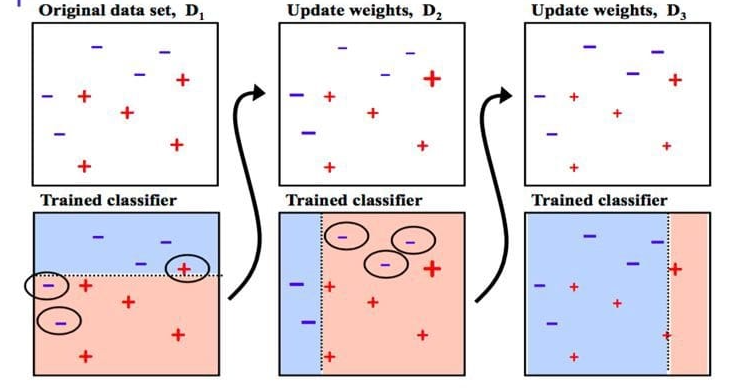

[Источник](https://pub.towardsai.net/all-about-adaboost-ba232b5521e9)

Алгоритм AdaBoost работает следующим образом:

1. **Инициализация весов**

 Изначально каждому обучающему примеру присваивается одинаковый вес.

2. **Обучение слабой модели**

 Первая слабая модель (например, маленькое дерево решений) обучается на исходных данных с учётом весов. Модель пытается минимизировать ошибки на этих данных.

3. **Оценка ошибок**

 Ошибки классификации оцениваются, и для каждой ошибки вычисляется вес ошибки. Чем больше ошибок допустила модель, тем меньший вес она получит в финальном ансамбле.

4. **Обновление весов**

 Весы неправильно классифицированных примеров увеличиваются, чтобы следующая модель сфокусировалась на тех примерах, которые были предсказаны неверно. Весы правильно классифицированных примеров, наоборот, уменьшаются.

5. **Повторение**

 Этот процесс повторяется несколько раз, создавая новые слабые модели, каждая из которых исправляет ошибки предыдущих. В конце итоговое предсказание получается путём взвешенной суммы предсказаний всех слабых моделей.

6. **Финальное предсказание**

 Для каждого примера взвешенные предсказания всех моделей объединяются. Модель с меньшей ошибкой вносит больший вклад в итоговое решение.

### Пример использования AdaBoost

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) можно использовать для задач классификации

In [ ]:
# Импортируем необходимые библиотеки
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Загрузим датасет пингвинов
penguins = sns.load_dataset("penguins")

# Удалим строки с пропущенными значениями
penguins.dropna(inplace=True)

# Закодируем категориальные переменные
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])
penguins['sex'] = label_encoder.fit_transform(penguins['sex'])
penguins['island'] = label_encoder.fit_transform(penguins['island'])

# Разделим данные на признаки (X) и целевую переменную (y)
X = penguins.drop(columns='species')  # Признаки: все, кроме 'species'
y = penguins['species']  # Целевая переменная: 'species'

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализируем и обучим модель AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada_clf.fit(X_train, y_train)

# Сделаем предсказания на тестовой выборке
y_pred = ada_clf.predict(X_test)

# Оценим точность модели
print("Classification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



[AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) можно использовать для задач регрессии

In [ ]:
# Импортируем необходимые библиотеки
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Загрузим датасет чаевых
tips = sns.load_dataset("tips")

# Закодируем категориальные переменные
label_encoder = LabelEncoder()
tips['sex'] = label_encoder.fit_transform(tips['sex'])
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])
tips['day'] = label_encoder.fit_transform(tips['day'])
tips['time'] = label_encoder.fit_transform(tips['time'])

# Разделим данные на признаки (X) и целевую переменную (y)
X = tips.drop(columns='tip')  # Признаки: все, кроме 'tip'
y = tips['tip']  # Целевая переменная: 'tip'

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализируем и обучим модель AdaBoost регрессора
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train, y_train)

# Сделаем предсказания на тестовой выборке
y_pred = ada_reg.predict(X_test)

# Оценим модель с помощью среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1.01


## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

В качестве датасета, на котором мы попрактикуем использование алгоритма AdaBoost, мы возьмем датасет Breast Cancer Wisconsin из библиотеки sklearn. Он содержит медицинские данные о раке молочной железы, которые используются для классификации опухолей как злокачественные (0 — malignant) или доброкачественные (1 — benign).

Импортируем датасет с помощью `load_breast_cancer` из модуля `sklearn.datasets`:

In [ ]:
# Импортируем модуль с датасетом Breast Cancer Wisconsin
from sklearn.datasets import load_breast_cancer

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Взглянем на значения признаков и целевой переменной:

In [ ]:
X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Разделим датасет на обучающую и тестовую выборки с помощью `train_test_split` с параметрами `test_size=0.3` и `random_state=42`:

In [ ]:
from sklearn.model_selection import ...

# Разделение данных на обучающую и тестовую выборки
...

Обучим алгоритм AdaBoost с 50 эстиматорами, `random_state` равному 42, и алгоритмом `SAMME`:

In [ ]:
from sklearn.ensemble import ...

# Инициализация модели AdaBoost
...

# Обучение модели AdaBoost
...

AdaBoostClassifier(algorithm='SAMME', random_state=42)

Оценим качество алгоритма с помощью `classification_report`:

In [ ]:
from sklearn.metrics import ...

# Предсказание
...

# Вывод отчета о классификации
report = ...
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Градиентный бустинг

### Что такое градиентный бустинг?

В градиентном бустинге, в отличии от AdaBoost, каждая следующая модель обучается на остатках (ошибках) предыдущей, минимизируя функцию потерь, что делает этот метод более гибким и устойчивым. Градиентный бустинг фокусируется на минимизации общей ошибки через градиенты функции потерь.

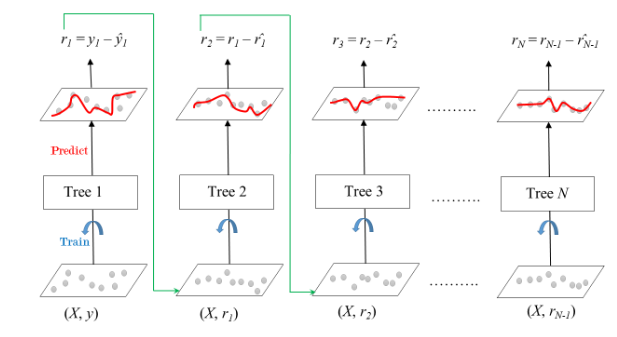

[Источник](https://www.geeksforgeeks.org/ml-gradient-boosting/)

Градиентный бустинг хорош тем, что он уменьшает переобучение, поскольку каждая новая модель фокусируется на ошибках предыдущих, а также он способен создавать сложные и высокоточные модели за счет последовательного улучшения.

### Как работает градиентный бустинг?

1. **Начальная модель:** Изначально строится простая модель (например, одно дерево решений), которая предсказывает значения на основе имеющихся данных. Часто эта начальная модель просто предсказывает среднее значение целевой переменной.

2. **Вычисление ошибки:** После первой модели вычисляется ошибка (разница между предсказанными и фактическими значениями). Цель градиентного бустинга — минимизировать эту ошибку.

3. **Построение новой модели на основе ошибки:** Затем строится следующая модель, которая фокусируется на предсказании значений ошибки. То есть новая модель обучается на тех же данных, но с учетом того, какие ошибки допустила предыдущая модель. В этом процессе используется градиент спада, отсюда и название "градиентный" бустинг. Новая модель учится предсказывать градиент ошибки.

4. **Комбинация моделей:** Каждый следующий шаг добавляет новую модель, которая улучшает общую комбинацию. Итоговое предсказание — это сумма (или взвешенное среднее) всех предыдущих моделей.

5. **Повторение процесса:** Шаги 2-4 повторяются до тех пор, пока ошибки не станут минимальными или пока не будет достигнуто заданное число моделей.

### Математическая формулировка

Пусть:
- $y$ — истинное значение целевой переменной,
- $f(x)$ — итоговая модель, построенная на базе нескольких базовых моделей,
- $f_0(x)$ — начальная модель (например, предсказание среднего).

На каждом шаге $m$ строится новая модель $h_m(x)$, которая предсказывает ошибки. Итоговое предсказание можно записать как:

$$
f_{m}(x) = f_{m-1}(x) + \alpha h_m(x)
$$

где $\alpha$ — коэффициент обучения (learning rate), который определяет, насколько сильно модель корректируется на каждом шаге.

Таким образом, каждая новая модель добавляет поправки, которые минимизируют ошибку, что позволяет улучшать итоговые предсказания.


### Пример практического использования

Алгоритм градиентного бустинга для задачи регрессии реализован в классе [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) в sklearn:

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = fetch_california_housing()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели градиентного бустинга
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2939973248643864


Для задачи классфикации вы можете использовать [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html):

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели градиентного бустинга
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Упражнение 2

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

Датасет "20 Newsgroups" представляет собой коллекцию текстовых данных, собранных из 20 новостных групп в Интернете. Давайте классифицируем тексты из этого датасета с помощью GradientBoostingClassifier.

Загрузим данные:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Загрузка данных
data = fetch_20newsgroups(
    subset='all',
    categories=[
        'rec.sport.baseball',
        'sci.space',
        'talk.politics.mideast',
        'comp.graphics'
    ],
    remove=('headers', 'footers', 'quotes')
)  # Выбор нескольких категорий для упрощения задачи

X = data.data
y = data.target

Взглянем на пример текста и его класс

In [ ]:
print("Text:")
print(X[2])

print("\nClass:")
print(y[2])

Text:

Please cite specific examples where an Arab party member was rejected
while a Jewish party member was accepted.  If you examine these I am
sure you will discover that the Arab party member did not have the power
base that his Jewish counterpart had.  The party structure in Israel
has changed quite a bit insofar as knesset member elections go.  Knesset
members for most parties are now elected via primaries.  The top standing
members end up with cabinet posts.  This is purely a political power
issue.  Check the ranking of Arab labor party members, as opposed
to Jewsih members and let me know which posts are held by Jews that
ranked lower in the party than their Arab fellow electees.

Once again, if for arguments sake, all the Arab Israelis were to vote
for Labor at the next election, you can rest assured that the number of
Arab MKs and cabinet members would increase proportionately to the
power shift.


You are overlooking the fact that they wield political power
as individuals ba

Разделим датасет на train и test c помощью `train_test_split` с параметрами `test_size=0.2`, `random_state=42`:

In [ ]:
from sklearn.model_selection import ...

# Разделение данных на обучающую и тестовую выборки
...

Датасет состоит из обычного текста. Чтобы наша модель могла работать с этим текстом, его сначала необходимо векторизировать. Для векторизации используйте TfidfVectorizer с параметрами `stop_words='english'` и `max_features=2000`. Затем мы должны передать векторы от TfidfVectorizer в GradientBoostingClassifier с параметрами `n_estimators=100`, `learning_rate=0.1`, `max_depth=3`, `random_state=42`. Затем, поместим векторизатор и классфикатор в [pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

vectorizer = ...
classifier = ...

# Создание конвейера
pipeline = Pipeline([
    ('tfidf', vectorizer),  # Шаг TF-IDF векторизации
    ('gb', classifier)  # Шаг классификации
])

Обучим pipeline c помощью функции fit:

In [ ]:
# Обучение модели с использованием конвейера
...

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, stop_words='english')),
                ('gb', GradientBoostingClassifier(random_state=42))])

Посмотрим на результаты классификации с помощью `classification_report`:

In [ ]:
from sklearn.metrics import ...

# Предсказание и оценка модели
...

print("\nClassification Report:\n", ...)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       220
           1       0.85      0.83      0.84       178
           2       0.72      0.90      0.80       189
           3       0.97      0.82      0.89       192

    accuracy                           0.84       779
   macro avg       0.86      0.85      0.85       779
weighted avg       0.86      0.84      0.85       779



## Заключение

## Заключение

В ходе этого занятия мы изучили два новых метода ансамблевого обучения: AdaBoost и Gradient Boosting.

**AdaBoost** — это алгоритм, который адаптивно корректирует ошибки предыдущих моделей, увеличивая вес неправильно классифицированных примеров. Это позволяет последующим моделям лучше сфокусироваться на сложных случаях и постепенно улучшать общую точность. Мы рассмотрели примеры использования AdaBoost для задач классификации и регрессии на реальных датасетах.

**Градиентный бустинг** — это более гибкий и устойчивый метод, который фокусируется на минимизации функции потерь через градиенты. Каждая новая модель в градиентном бустинге обучается на остатках предыдущих моделей, что позволяет постепенно улучшать предсказания и уменьшать переобучение. Мы также рассмотрели примеры использования градиентного бустинга для задач регрессии и классификации.
